In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bitext_Sample_Customer_Service_Testing_Dataset.csv to Bitext_Sample_Customer_Service_Testing_Dataset (1).csv


In [ ]:
df.head()

,utterance,intent,category,tags
0,I have a question about cancelling an order,cancel_order,ORDER,B
1,help canceling the order I have made,cancel_order,ORDER,B
2,I do not know how to cancel an order I have made,cancel_order,ORDER,BE
3,where can I cancel the last order I made?,cancel_order,ORDER,BI
4,I don't want the last order I made,cancel_order,ORDER,B


In [ ]:
df.columns

Index(['utterance', 'intent', 'category', 'tags'], dtype='object')

Rename the column

In [ ]:
df = df.rename(columns={'utterance':'text'})


In [ ]:
df = df.drop(columns=['tags'])

In [ ]:
df.head()

,text,intent,category,clean_text
0,I have a question about cancelling an order,cancel_order,ORDER,question cancelling order
1,help canceling the order I have made,cancel_order,ORDER,help canceling order made
2,I do not know how to cancel an order I have made,cancel_order,ORDER,know cancel order made
3,where can I cancel the last order I made?,cancel_order,ORDER,cancel last order made
4,I don't want the last order I made,cancel_order,ORDER,dont want last order made


CLEANING


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)
df[['text','clean_text']].head()


,text,clean_text
0,I have a question about cancelling an order,question cancelling order
1,help canceling the order I have made,help canceling order made
2,I do not know how to cancel an order I have made,know cancel order made
3,where can I cancel the last order I made?,cancel last order made
4,I don't want the last order I made,dont want last order made


CLASS DISTRIBUTION

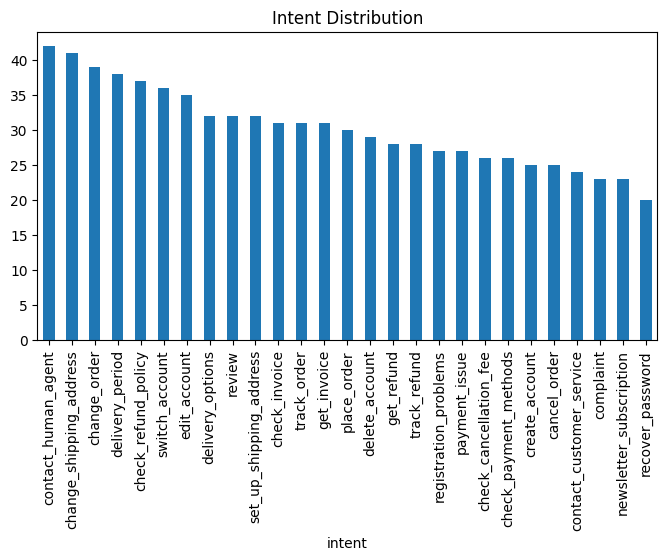

In [ ]:
df['intent'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Intent Distribution")
plt.show()

In [ ]:
df['intent'].value_counts()

,count
intent,
contact_human_agent,42
change_shipping_address,41
change_order,39
delivery_period,38
check_refund_policy,37
switch_account,36
edit_account,35
delivery_options,32
review,32


WORDCLOUD

Complaint intent

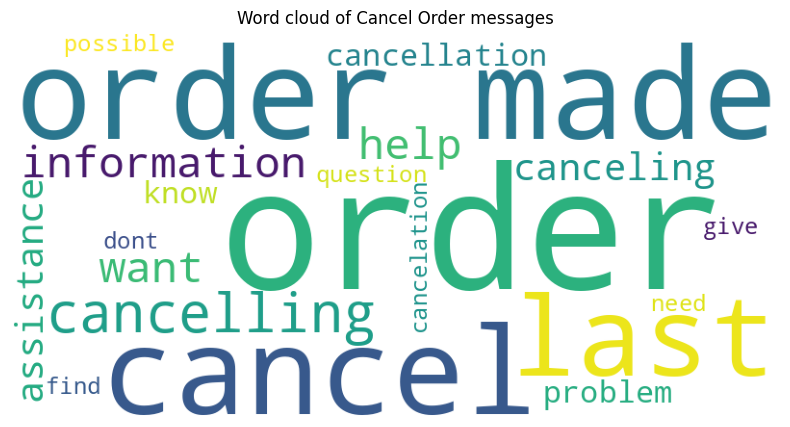

In [ ]:
msgs = ""

for msg in df[df['intent']=='cancel_order']['clean_text']:
    for word in msg.split():
        msgs = msgs + word + " "

wcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(msgs)

plt.figure(figsize=(10,5))
plt.imshow(wcloud)
plt.axis('off')
plt.title('Word cloud of Cancel Order messages')
plt.show()

Refund Request

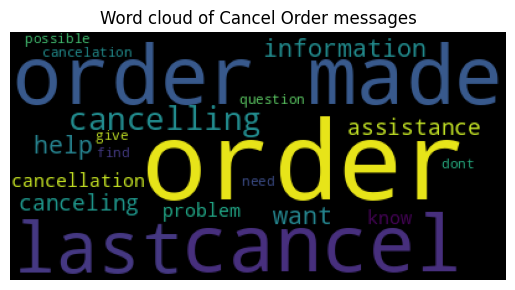

In [ ]:
msgs = ""

for msg in df[df['intent']=='cancel_order']['clean_text']:
    for word in msg.split():
        msgs = msgs + word + " "

wcloud = WordCloud().generate(msgs)

plt.imshow(wcloud)
plt.axis('off')
plt.title('Word cloud of Cancel Order messages')
plt.show()

In [ ]:
refund_intents = [
    'CHECK_REFUND_POLICY',
    'REQUEST_REFUND',
    'REFUND_STATUS'
]

df['intent'] = df['intent'].replace(refund_intents, 'Refund_Request')

TRAIN–TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['intent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

TF–IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_test_pred = model.predict(X_test_tfidf)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_tfidf)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
confusion_matrix(y_test, y_test_pred).shape

(27, 27)

In [ ]:
results = pd.DataFrame({
    'Text': X_test.values,
    'Actual_Intent': y_test.values,
    'Predicted_Intent': y_test_pred
})

results.head(10)

,Text,Actual_Intent,Predicted_Intent
0,assistance get refund,get_refund,get_refund
1,need help cxalling customer support,contact_customer_service,contact_customer_service
2,check time customer service available,contact_customer_service,contact_customer_service
3,submit feedback company,review,review
4,know get invoice april,get_invoice,get_invoice
5,help check delivery option available,delivery_options,delivery_options
6,help getting invoice,get_invoice,get_invoice
7,need assistance change several item order,change_order,change_order
8,would like information changing shipping address,change_shipping_address,change_shipping_address
9,help report registration issue,registration_problems,registration_problems


In [ ]:
predict_intent("I want my money back")


'check_refund_policy'

In [ ]:
model.predict(X_test_tfidf)

array(['get_refund', 'contact_customer_service',
       'contact_customer_service', 'review', 'get_invoice',
       'delivery_options', 'get_invoice', 'change_order',
       'change_shipping_address', 'registration_problems', 'cancel_order',
       'check_refund_policy', 'newsletter_subscription',
       'check_cancellation_fee', 'change_order', 'create_account',
       'check_invoice', 'get_refund', 'cancel_order', 'recover_password',
       'edit_account', 'payment_issue', 'change_shipping_address',
       'delivery_period', 'check_invoice', 'track_order',
       'check_cancellation_fee', 'check_refund_policy',
       'delivery_options', 'check_cancellation_fee', 'delete_account',
       'newsletter_subscription', 'track_refund', 'change_order',
       'get_refund', 'check_payment_methods', 'delete_account',
       'switch_account', 'review', 'track_refund', 'recover_password',
       'track_order', 'change_shipping_address', 'check_cancellation_fee',
       'payment_issue', 'check_p

In [ ]:
pd.Series(model.predict(X_test_tfidf)).value_counts()

,count
contact_human_agent,9
switch_account,9
delivery_period,9
check_refund_policy,8
change_order,8
edit_account,7
delete_account,7
change_shipping_address,7
get_invoice,6
get_refund,6


ERROR ANALYSIS

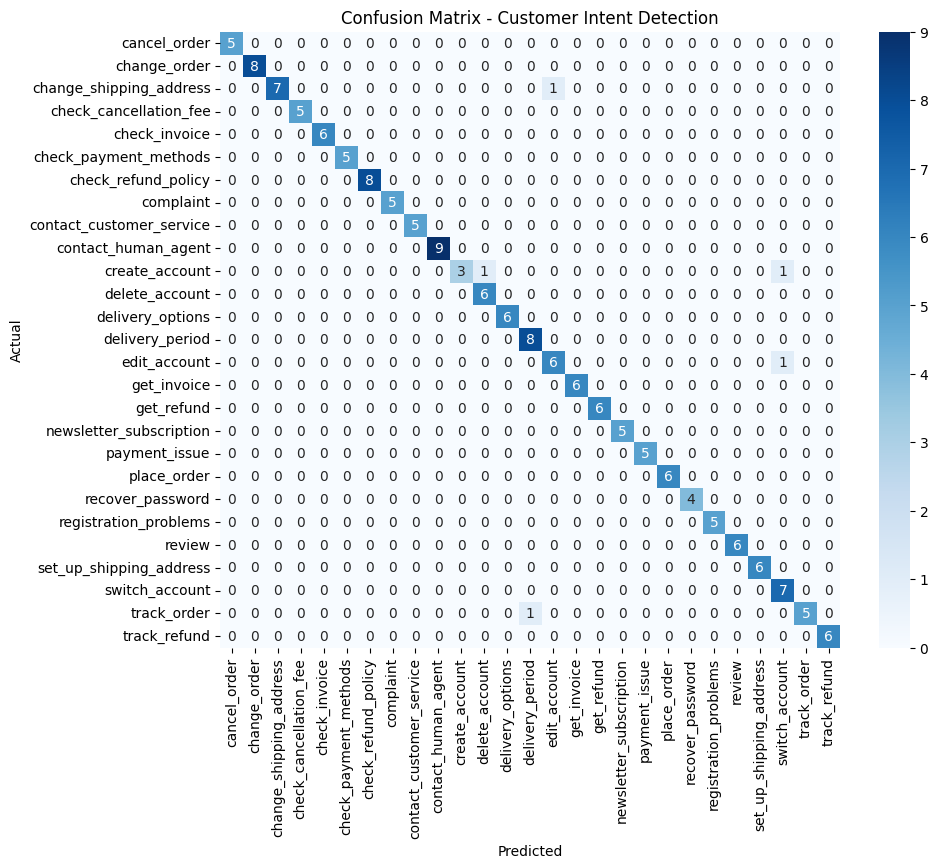

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Customer Intent Detection")
plt.show()


Strong overall performance: The confusion matrix shows dominant diagonal values, indicating that the model correctly classifies most customer intents.

Low misclassification rate: Off-diagonal values are minimal, suggesting consistent performance across different intent classes without bias.

Confusion only among similar intents: Minor errors occur between closely related intents (e.g., address setup vs address change) due to overlapping language patterns.

Real-world suitability: Clearly separable intents such as refunds, order cancellation, and payment issues demonstrate the model’s usefulness for automated customer support systems.

In [ ]:
import numpy as np

cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

cm_df


,cancel_order,change_order,change_shipping_address,check_cancellation_fee,check_invoice,check_payment_methods,check_refund_policy,complaint,contact_customer_service,contact_human_agent,...,newsletter_subscription,payment_issue,place_order,recover_password,registration_problems,review,set_up_shipping_address,switch_account,track_order,track_refund
cancel_order,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
change_order,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
change_shipping_address,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
check_cancellation_fee,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
check_invoice,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
check_payment_methods,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
check_refund_policy,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
complaint,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
contact_customer_service,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
contact_human_agent,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
errors = pd.DataFrame({
    'Text': X_test.values,
    'Actual': y_test.values,
    'Predicted': y_test_pred
})

errors = errors[errors['Actual'] != errors['Predicted']]
errors.head(5)


,Text,Actual,Predicted
64,need assistance craete new user account,create_account,switch_account
83,dont know create another standard account,create_account,delete_account
86,address changed edit,change_shipping_address,edit_account
112,know modify user account,edit_account,switch_account
130,order arrive,track_order,delivery_period
